In [1]:
# --- Cell 1: Imports and Setup ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Set plot style
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
%matplotlib inline

# --- File Paths ---
# We are in notebooks/, so we go up one level to the root
PROCESSED_FILE = '../data/processed/sales_cleaned.csv'
FIGURES_DIR = '../reports/figures/'

import os
os.makedirs(FIGURES_DIR, exist_ok=True)

In [2]:
# --- Cell 2: Load Cleaned Data ---

# Load the data, making sure to parse 'Order Date' back into a datetime object
df = pd.read_csv(PROCESSED_FILE, parse_dates=['Order Date'])

print("Data loaded successfully.")
print(f"Shape: {df.shape}")
print("\n--- Data Types ---")
df.info()

print("\n--- Sample Data ---")
df.head()

Data loaded successfully.
Shape: (185639, 15)

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185639 entries, 0 to 185638
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185639 non-null  int64         
 1   Product           185639 non-null  object        
 2   Quantity Ordered  185639 non-null  int64         
 3   Price Each        185639 non-null  float64       
 4   Revenue           185639 non-null  float64       
 5   Order Date        185639 non-null  datetime64[ns]
 6   Year              185639 non-null  int64         
 7   Month             185639 non-null  int64         
 8   Day               185639 non-null  int64         
 9   DayOfWeek         185639 non-null  int64         
 10  Hour              185639 non-null  int64         
 11  Purchase Address  185639 non-null  object        
 12  City              185639 non-null  object       

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Year,Month,Day,DayOfWeek,Hour,Purchase Address,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,2019,4,19,4,8,"917 1st St, Dallas, TX 75001",Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,2019,4,7,6,22,"682 Chestnut St, Boston, MA 02215",Boston,MA,2215
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,2019,4,12,4,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,2019,4,12,4,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,2019,4,30,1,9,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,90001


C:\Users\LOQ\AppData\Local\Temp\ipykernel_11644\3868346545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')


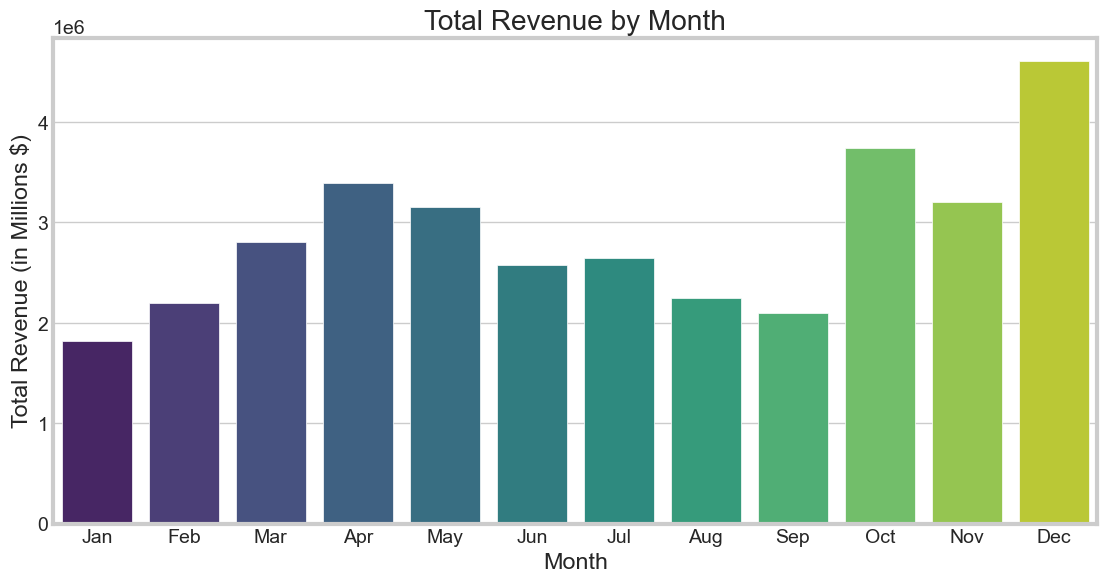

In [3]:
# --- Cell 3: Monthly Revenue Analysis ---

# Group by month and sum the revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Get month names for plotting
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')

plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue (in Millions $)')
plt.xticks(ticks=range(12), labels=month_names)
plt.savefig(os.path.join(FIGURES_DIR, '01_monthly_revenue.png'))
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_11644\2607556483.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.values, y=city_revenue.index, palette='Spectral')


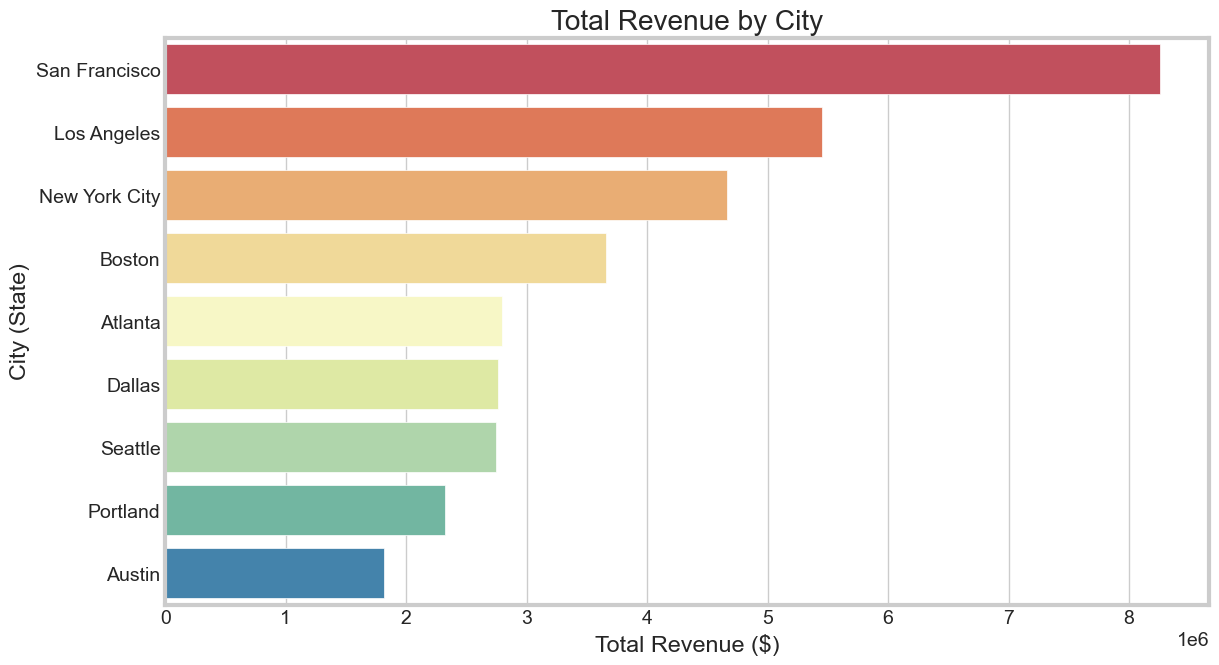

In [4]:
# --- Cell 4: City-wise Revenue Analysis ---

# Group by City_State and sum revenue, then sort
city_revenue = df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=city_revenue.values, y=city_revenue.index, palette='Spectral')

plt.title('Total Revenue by City')
plt.xlabel('Total Revenue ($)')
plt.ylabel('City (State)')
plt.savefig(os.path.join(FIGURES_DIR, '02_city_revenue.png'))
plt.show()

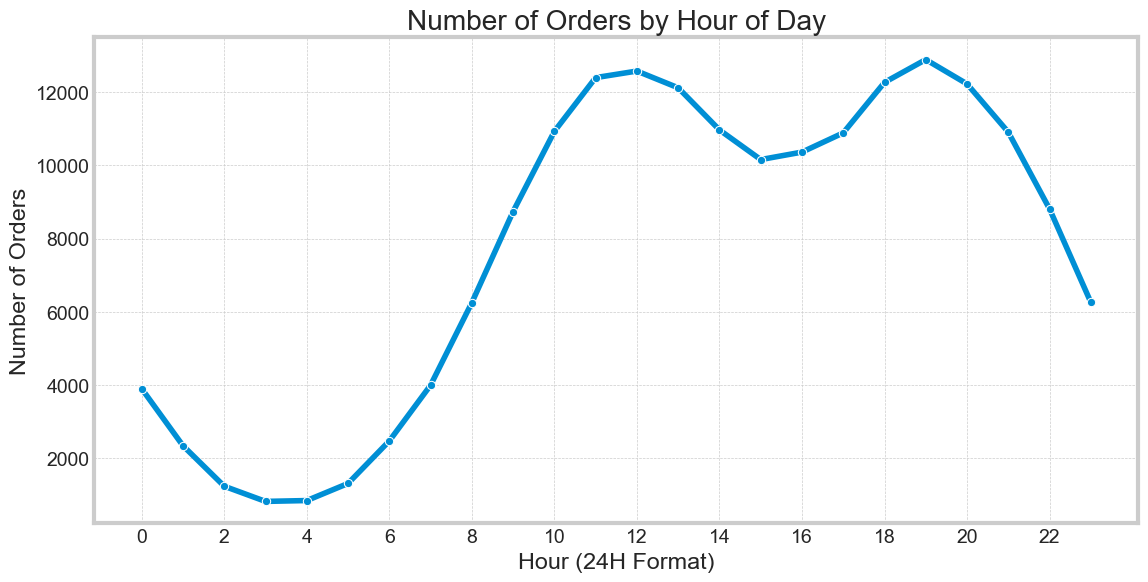

In [5]:
# --- Cell 5: Hourly Demand Analysis ---

# Group by Hour and count the number of orders (using 'Order ID')
hourly_orders = df.groupby('Hour')['Order ID'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o')

plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour (24H Format)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24, 2)) # Show ticks every 2 hours
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(os.path.join(FIGURES_DIR, '03_hourly_orders.png'))
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_11644\3080150057.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LOQ\AppData\Local\Temp\ipykernel_11644\3080150057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


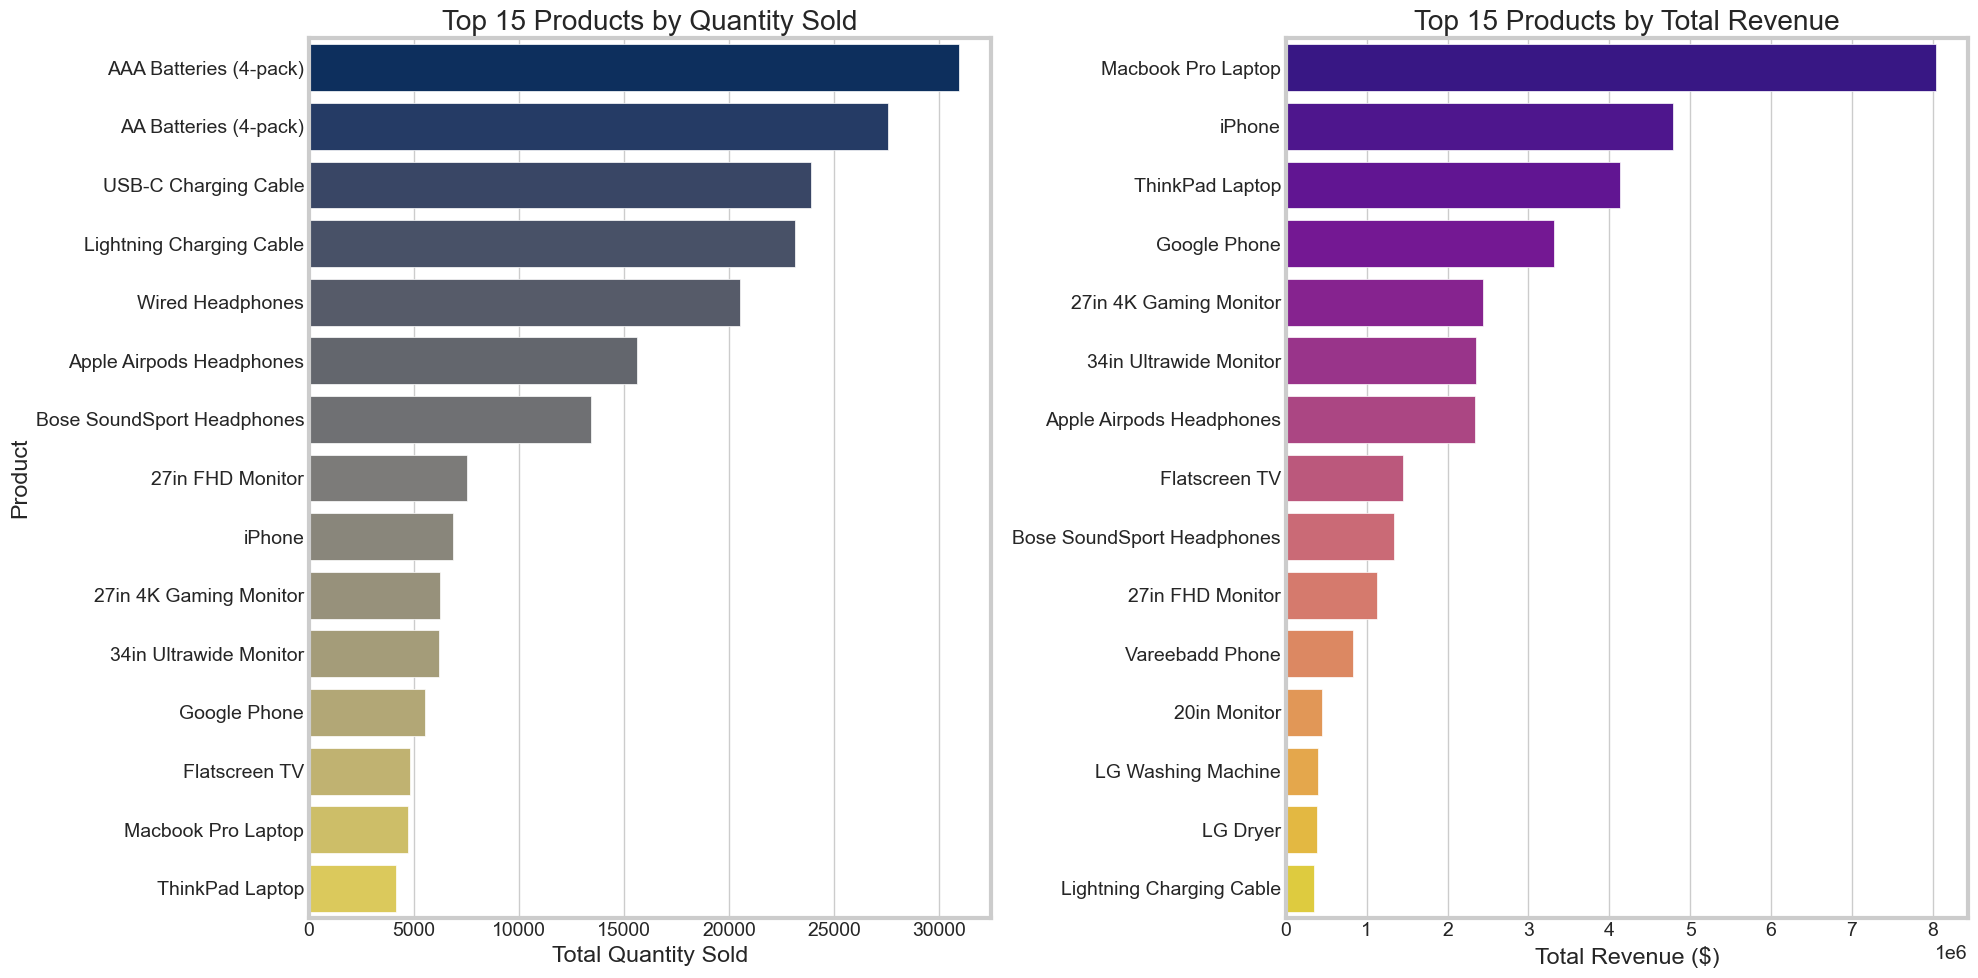

In [6]:
# --- Cell 6: Top Product Analysis (Quantity vs. Revenue) ---

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# --- By Quantity ---
top_products_qty = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(15)
sns.barplot(
    x=top_products_qty.values, 
    y=top_products_qty.index, 
    ax=axes[0], 
    palette='cividis'
)
axes[0].set_title('Top 15 Products by Quantity Sold')
axes[0].set_xlabel('Total Quantity Sold')
axes[0].set_ylabel('Product')

# --- By Revenue ---
top_products_rev = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(15)
sns.barplot(
    x=top_products_rev.values, 
    y=top_products_rev.index, 
    ax=axes[1], 
    palette='plasma'
)
axes[1].set_title('Top 15 Products by Total Revenue')
axes[1].set_xlabel('Total Revenue ($)')
axes[1].set_ylabel('') # No y-label needed

plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, '04_top_products_qty_vs_rev.png'))
plt.show()

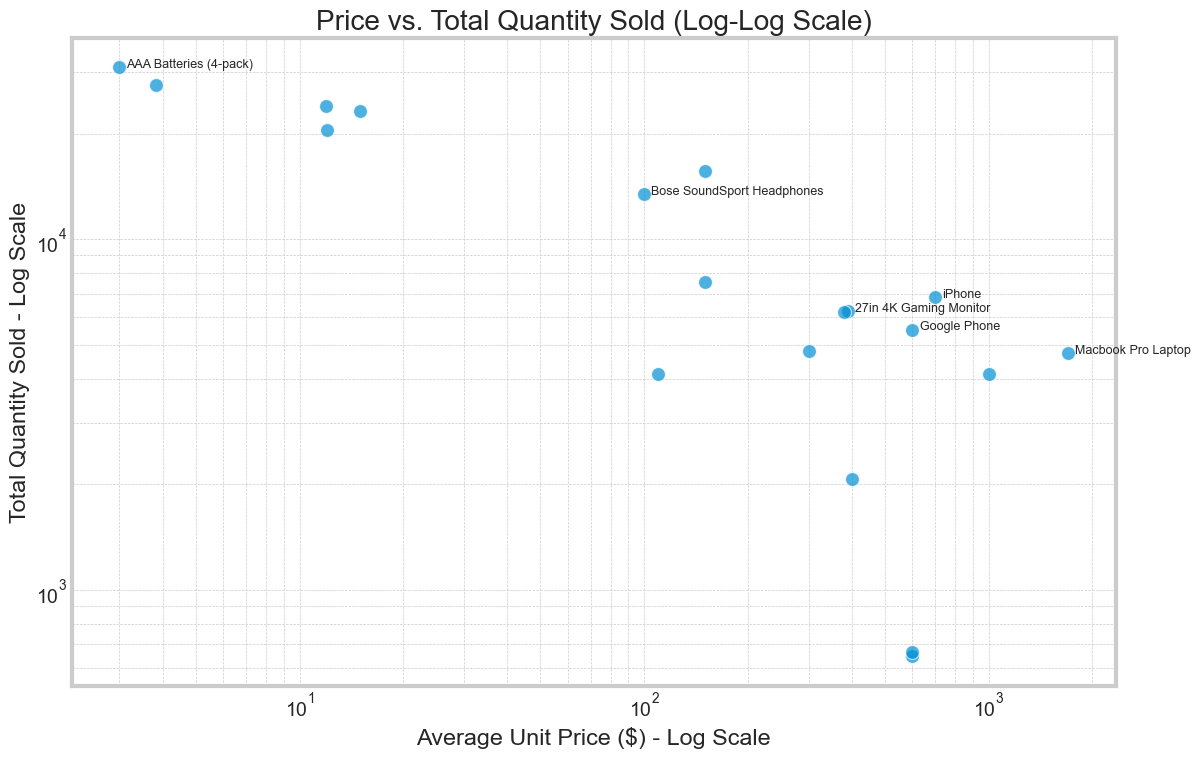

In [7]:
# --- Cell 7: Price vs. Demand (Across All Products) ---

# Get average price and total quantity for each product
product_summary = df.groupby('Product').agg(
    Avg_Price=('Price Each', 'mean'),
    Total_Quantity=('Quantity Ordered', 'sum')
).reset_index()

plt.figure(figsize=(12, 8))

# We use a log-log scale because both price and quantity span several orders of magnitude
g = sns.scatterplot(data=product_summary, x='Avg_Price', y='Total_Quantity', s=100, alpha=0.7)
g.set_xscale('log')
g.set_yscale('log')

plt.title('Price vs. Total Quantity Sold (Log-Log Scale)')
plt.xlabel('Average Unit Price ($) - Log Scale')
plt.ylabel('Total Quantity Sold - Log Scale')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels for a few key products to make the chart readable
products_to_label = [
    'Macbook Pro Laptop', 'iPhone', 'AAA Batteries (4-pack)', 
    'Bose SoundSport Headphones', '27in 4K Gaming Monitor', 'Google Phone'
]
for _, row in product_summary.iterrows():
    if row['Product'] in products_to_label:
        # Place text slightly to the right of the point
        plt.text(row['Avg_Price'] * 1.05, row['Total_Quantity'], row['Product'], fontsize=9, ha='left')

plt.savefig(os.path.join(FIGURES_DIR, '05_price_vs_demand_loglog.png'))
plt.show()